In [41]:
import os

# 获取当前工作目录

current_directory = os.getcwd()

print("当前工作目录:", current_directory)

当前工作目录: D:\Data\Shap


In [42]:
import pandas as pd
          
import numpy as np

import matplotlib.pyplot as plt
          
from sklearn.model_selection import train_test_split   

In [43]:
# 设置字体为新罗马数字
plt.rcParams['font.family'] = 'Times New Roman'

# 处理负号          
plt.rcParams['axes.unicode_minus'] = False

# 忽略警告
import warnings
          
warnings.filterwarnings("ignore")

In [44]:
# 读取数据

df = pd.read_csv('Data_target.csv')

# 删除 NaN 值

df.dropna(inplace=True)

# 检查是否还存在缺失值 print(df.isnull().sum())

In [45]:
# 划分特征和目标变量 

# 删除 'target' 列

X = df.drop(['Target'], axis=1)        

# 获取 'target' 列作为目标变量

y = df['Target']  

In [46]:
# 划分训练集和测试集      
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df['Target'])
# 观察前几行
df.head()

Size  DOI     TT  TB  BASO%   NLR  Grade   PNI  LVI  Target
0    15  0.2  10.61   1    0.8  2.23       2    0    0       0
1    30  0.3  12.30   1    0.9  2.56       2    1    0       0
2    15  0.4  13.71  29    0.5  3.82       2    1    0       1
3     5  0.5   4.10   7    0.5  2.65       1    0    0       0
4    18  0.6   6.52   2    0.7  0.81       2    0    0       1

In [47]:
print(df)

     Size   DOI     TT  TB  BASO%   NLR  Grade   PNI  LVI  Target
0      15   0.2  10.61   1    0.8  2.23       2    0    0       0
1      30   0.3  12.30   1    0.9  2.56       2    1    0       0
2      15   0.4  13.71  29    0.5  3.82       2    1    0       1
3       5   0.5   4.10   7    0.5  2.65       1    0    0       0
4      18   0.6   6.52   2    0.7  0.81       2    0    0       1
..    ...   ...    ...  ..    ...   ...     ...  ...  ...     ...
549    30  10.0   7.72  25    0.3  4.54       1    0    0       1
550    20  10.0   1.70   4    0.0  1.18       1    0    0       0
551    40  10.0   8.58   3    0.6  0.81       2    0    1       1
552    26  10.0  14.63   0    0.5  0.59       2    1    0       1
553    20  10.0   3.72  13    1.2  0.37       1    0    0       0

[554 rows x 10 columns]


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# 创建随机森林回归器实例，并设置参数
rf_regressor = RandomForestRegressor ( 
    
    n_estimators=100,               # 'n_estimators'是森林中树的数量。默认是100，可以根据需要调整。    
    
    criterion='squared_error',      # 'criterion'参数指定用于拆分的质量指标。'squared_error'（默认）表示使用均方误差，另一选项是'absolute_error'。    max_depth=None,           # 'max_depth'限制每棵树的最大深度。'None'表示不限制深度。    min_samples_split=2,      # 'min_samples_split'指定一个节点分裂所需的最小样本数。默认是2。    
    
    min_samples_leaf=1,             # 'min_samples_leaf'指定叶子节点所需的最小样本数。默认是1。    
    
    min_weight_fraction_leaf=0.0,   # 'min_weight_fraction_leaf'与'min_samples_leaf'类似，但基于总样本权重。默认是0.0。    
    
    random_state=42,                # 'random_state'控制随机数生成，以便结果可复现。42是一个常用的随机种子。    
    
    max_leaf_nodes=None,           #  'max_leaf_nodes'限制每棵树的最大叶子节点数。'None'表示不限制。    
    
    min_impurity_decrease=0.0      # 'min_impurity_decrease'在分裂节点时要求的最小不纯度减少量。默认是0.0。

)

In [50]:
# 训练模型
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# 获取随机森林模型的特征贡献度（重要性）      
feature_importances = rf_regressor.feature_importances_
          
# 将特征和其重要性一起排序         
sorted_indices = np.argsort(feature_importances)[::-1]  # 逆序排列，重要性从高到低
          
sorted_features = X_train.columns[sorted_indices]
          
sorted_importances = feature_importances[sorted_indices]
          
# 绘制按重要性排序的特征贡献性柱状图        
plt.figure(figsize=(10, 6), dpi=1200) 
          
# 使用渐变色，确保最高值为红色
bars = plt.barh(sorted_features, sorted_importances, color="steelblue")

# 添加坐标轴标签
plt.xlabel('Importance',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'RandomForest',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件        
plt.gca().invert_yaxis()
          
# 显示图表        
plt.show()

In [52]:
import shap
explainer = shap.TreeExplainer(rf_regressor)

shap_values = explainer.shap_values(X)

In [53]:
explainer = shap.TreeExplainer(rf_regressor)
          
# 计算shap值为Explanation格式
          
shap_values_Explanation = explainer(X)

In [56]:
# 宽度为6英寸，高度为8英寸,分辨率为1200
plt.figure(figsize=(6, 8), dpi=1200)
          
# 绘制蜂群图，并设置 show=False 以避免直接显示         
shap.plots.beeswarm(shap_values_Explanation, show=False,max_display=10)
   
# 开启网格线
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.1)  

# 添加坐标轴标签
plt.xlabel('SHAP value (impact on OLNM)',fontsize=10,fontweight='bold')

plt.ylabel('',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')

plt.savefig("SHAP_Beeswarm_RF.pdf", format='pdf',bbox_inches='tight')

plt.tight_layout()

plt.show()

In [57]:
# 设置 max_display 值
max_display = 10

# 创建图形
plt.figure(figsize=(6,8), dpi=1200)

# 创建 SHAP 值条形图，并使用 max_display 参数限制最多显示的特征数量
shap.plots.bar(shap_values_Explanation, max_display=max_display, show=False)

# 获取当前图形的 Axes
ax = plt.gca()

# 隐藏条形图后面的数字

for text in ax.texts:
    text.set_visible(False)
    
# 获取 SHAP 值并进行排序
shap_values_sorted = shap_values_Explanation.values.flatten()
sorted_indices = np.argsort(shap_values_sorted)[::-1]  # 逆序排列
sorted_shap_values = shap_values_sorted[sorted_indices][:max_display]

# 创建从蓝色到红色的渐变色
colors = plt.cm.autumn(np.linspace(0, 1, max_display))

# 应用颜色到条形图
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])

# 添加坐标轴标签
plt.xlabel('Mean SHAP value (average impact on OLNM)',fontsize=10)

plt.ylabel('',fontsize=10)

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=10)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件 
plt.savefig("SHAP_Bar_RF.pdf", format='pdf',bbox_inches='tight')

plt.tight_layout()

plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV  # 导入 GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # 导入随机森林分类器

In [24]:
# 初始化随机森林分类器

model_rf = RandomForestClassifier(random_state=8)

# 设置需要调优的参数网格

param_grid = {
    
    'n_estimators': [50, 100, 200],         # 树的数量
    
    'max_depth': [3, 5, 10, None],          # 树的最大深度
    
    'min_samples_split': [2, 5, 10],         # 内部节点再划分所需的最小样本数
    
    'min_samples_leaf': [1, 2, 4],           # 叶子节点最小样本数
    
    'bootstrap': [True, False],              # 是否使用自助采样
    
    'criterion': ['gini', 'entropy']        # 分裂标准

}

# 使用GridSearchCV来寻找最优的超参数

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# 拟合模型
grid_search.fit(X_train, y_train)

# 打印最优参数和评分

print("最优参数: ", grid_search.best_params_)

print("最优得分: ", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
最优参数:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
最优得分:  0.835367722165475


In [25]:
# 获取最优模型
best_model = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 评估模型（例如，计算准确率） 
from sklearn.metrics import accuracy_score

print("测试集准确率: ", accuracy_score(y_test, y_pred))

测试集准确率:  0.7927927927927928


In [26]:
best_model.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=8)

In [27]:
import shap

explainer = shap.TreeExplainer(best_model)

# 计算shap值为Explanation格式

shap_values_Explanation = explainer(X)

print("RF模型Explanation格式维度:",shap_values_Explanation.shape)

RF模型Explanation格式维度: (554, 9, 2)


In [28]:
# 提取类别 0 的 SHAP 值

shap_values_class_0 = shap_values_Explanation[:, :, 0]

# 提取类别 1 的 SHAP 值

shap_values_class_1 = shap_values_Explanation[:, :, 1]

In [29]:
plt.figure(figsize=(10, 5), dpi=1200)

# 绘制第3个样本0类别的 SHAP 瀑布图

shap.plots.waterfall(shap_values_class_0[462], show=False, max_display=13)

# 保存图像为 PDF 文件 
plt.savefig("SHAP_Waterfall_RF[462,0].pdf", format='pdf',bbox_inches='tight')

plt.tight_layout()

plt.show()

In [33]:
plt.figure(figsize=(10, 5), dpi=1200)
# 绘制第3个样本1类别的 SHAP 瀑布图
shap.plots.waterfall(shap_values_class_1[462], show=False, max_display=13)

# 保存图像为 PDF 文件 
plt.savefig("SHAP_Waterfall_RF[462,1].pdf", format='pdf',bbox_inches='tight')

plt.tight_layout()

plt.show()

In [90]:
plt.figure(figsize=(10, 5), dpi=1200)

# 绘制第3个样本0类别的 SHAP 瀑布图

shap.plots.waterfall(shap_values_class_0[408], show=False, max_display=13)

# 保存图像为 PDF 文件 

plt.savefig("SHAP_Waterfall_RF[408,0].pdf", format='pdf',bbox_inches='tight')

plt.tight_layout()

plt.show()

In [91]:

plt.figure(figsize=(10, 5), dpi=1200)

# 绘制第3个样本1类别的 SHAP 瀑布图
shap.plots.waterfall(shap_values_class_1[408], show=False, max_display=13)

# 保存图像为 PDF 文件 
plt.savefig("SHAP_Waterfall_RF[408,1].pdf", format='pdf',bbox_inches='tight')

plt.tight_layout()

plt.show()


In [17]:
import shap

explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X)

print("基准值:",explainer.expected_value)

print("shap值维度:",shap_values.shape)

基准值: [0.65598375 0.34401625]
shap值维度: (554, 9, 2)


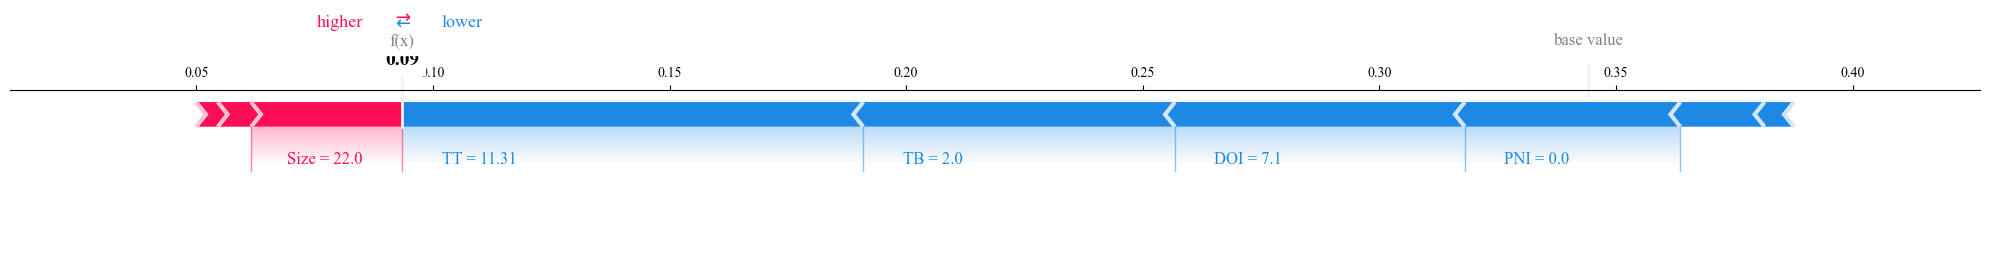

In [23]:

# 可视化X中第1个样本的第0类别的SHAP值，展示各个特征对该样本在第0类别上的预测的贡献情况
sample_index = 4

# 绘制力图 
shap.force_plot(
                explainer.expected_value[1],          # 类别 1 的基准值（即模型在不知道任何特征时对类别 0 的平均预测值）
                
                shap_values[sample_index,:,1],        # 第1个样本的所有特征对类别0预测的SHAP值
                
                X_test.iloc[sample_index],            # 第0个样本的特征值，这里的f(X)=0.91实际上就是随机森林RF模型预测这一个样本为0这一类的概率
                
                matplotlib=True ,                    # 使用 Matplotlib 绘制可视化图形
                
                contribution_threshold=0.1,
                
                show=False)

plt.tight_layout()

# 保存图像为 PDF 文件 

plt.savefig("SHAP_Force_RF[1,0.09].pdf", format='pdf', bbox_inches='tight')

plt.show()

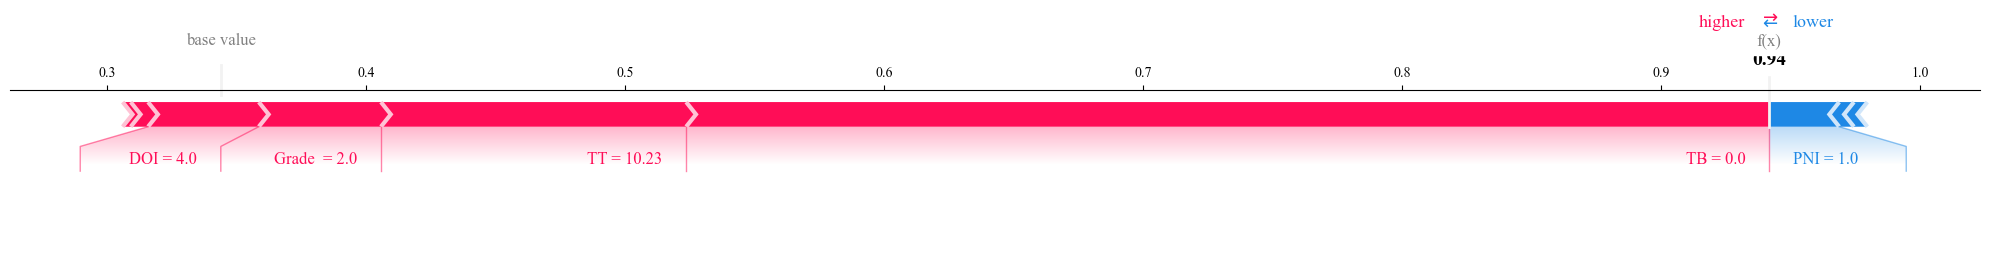

In [20]:
# 可视化X中第1个样本的第0类别的SHAP值，展示各个特征对该样本在第0类别上的预测的贡献情况
sample_index = 95

# 绘制力图 
shap.force_plot(
                explainer.expected_value[1],          # 类别 1 的基准值（即模型在不知道任何特征时对类别 0 的平均预测值）
                
                shap_values[sample_index,:,1],        # 第1个样本的所有特征对类别0预测的SHAP值
                
                X_test.iloc[sample_index],            # 第0个样本的特征值，这里的f(X)=0.91实际上就是随机森林RF模型预测这一个样本为0这一类的概率
                
                matplotlib=True ,                    # 使用 Matplotlib 绘制可视化图形
                
                contribution_threshold=0.1,
                
                show=False)

plt.tight_layout()

# 保存图像为 PDF 文件 

plt.savefig("SHAP_Force_RF[1,0.94].pdf", format='pdf', bbox_inches='tight')
plt.show()